# Experiments on Random Osborne Algorithm for Matrix Balancing

In [1]:
import osborn
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import utils

## 1. Near-linear convergence

In [2]:
variants = ['cyclic', 'random_cyclic', 'greedy', 'random']
epsilon_values = [10**(-i) for i in range(10)]
n_values = [10, 25, 50, 100, 200]
non_zero_ratios = [.1, .2, .3, .5, .8]

execution_time = dict()


for variant in variants:
    for n in n_values:
        for non_zero_ratio in non_zero_ratios:
            m = n*non_zero_ratio
            K = np.random.randn(n,n)

## 2. Sparsity

70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


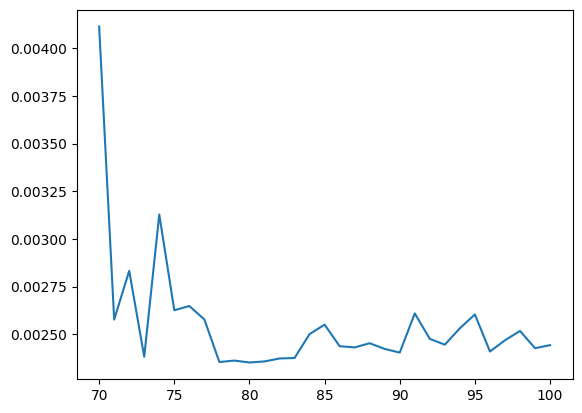

In [8]:
number_of_trials = 100
times = []
for m in range(70, 101):
    print(m)
    times_m = []
    for trial in range(number_of_trials):
        K = scipy.sparse.random(10, 10, density=m * 1e-2).toarray()

        kappa = np.sum(K)/np.min(K[K != 0])
        
        balancer = osborn.MatrixBalancer(K, device='cpu', epsilon=1e-3)
        start_time = time.time()
        balanced_matrix = balancer.balance(method='random')
        
        times_m.append((time.time() - start_time))

    times.append(np.median(times_m))

#plt.semilogy(range(90, 101), times)
plt.plot(range(70, 101), times)


/var/folders/rj/j_zv_k4525l7mz1yjsr_p2yr0000gn/T/ipykernel_25487/3594064461.py:16: RuntimeWarning: invalid value encountered in log
  x.append(m* n/epsilon * min(d, 1/epsilon) * np.log(kappa))


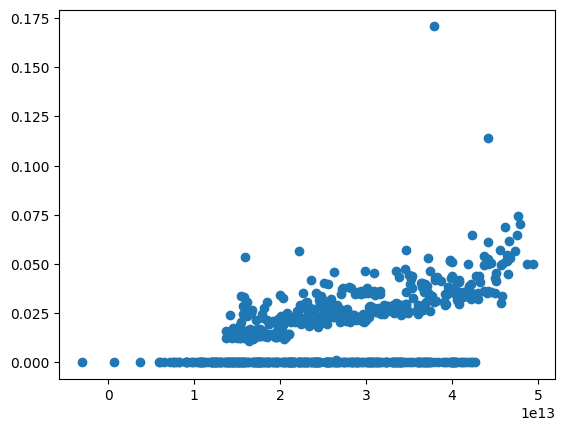

In [49]:
epsilon=1e-4
x = []
times = []
#for n in range(5, 100):
for n in range(170, 300):
    m = int(0.9 * n)
    for _ in range(10):
        kappa = 1000 * (np.random.rand() - .5)
        matrix = utils.generate_matrix_params(n=n, m=m, kappa=kappa)
        d = utils.diameter_of_matrix(matrix)

        balancer = osborn.MatrixBalancer(matrix, device='cpu', epsilon=epsilon)
        start_time = time.time()
        balanced_matrix = balancer.balance(method='random_cyclic')
        
        x.append(m* n/epsilon * min(d, 1/epsilon) * np.log(kappa))
        #x.append(n**2 * m/epsilon**2 * np.log(kappa))
        times.append((time.time() - start_time))

plt.scatter(x, times)

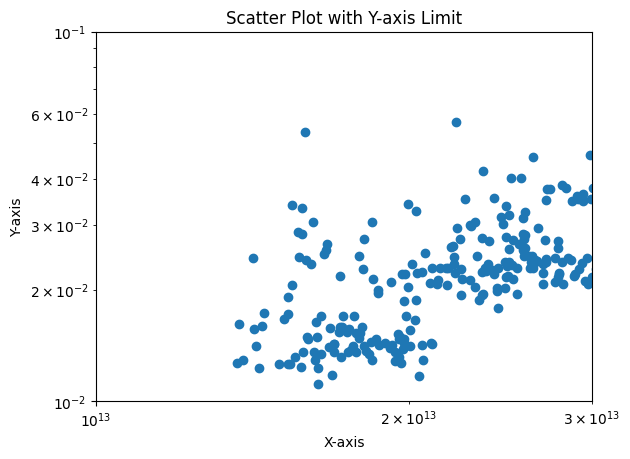

In [50]:
plt.scatter(x, times)
plt.xlim(1e13, 3e13)
plt.ylim(1e-2, 1e-1)  # Set the y-axis limits
plt.xscale("log")
plt.yscale("log")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Y-axis Limit')
plt.show()

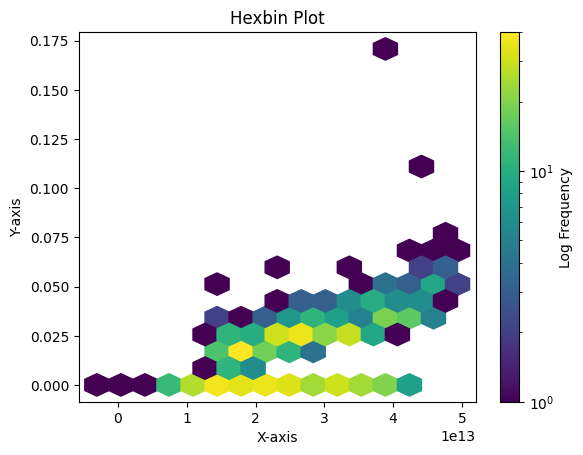

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'x' and 'times' columns
data = {'x': x,
        'times': times}

df = pd.DataFrame(data)
#df = df[df['times'] > 1e2]

# Create a hexbin plot
plt.hexbin(df['x'], df['times'], gridsize=(15, 10), cmap='viridis', bins='log')

plt.colorbar(label='Log Frequency')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Hexbin Plot')
plt.show()
